#Researching & Developing a Market Neutral Strategy
## Stocktwits & Twitter Trader Sentiment

The process involves the following steps:

* Researching partner data.
* Designing a pipeline.
* Analyzing an alpha factor with Alphalens.
* Implementing our factor in the IDE (see backtest in next comment).
* Evaluating the backtest using Pyfolio.

## Part 1 - Investigate the Data with Blaze

In [1]:
import matplotlib.pyplot as plt
from odo import odo
import pandas as pd
import blaze as bz
import numpy as np
import scipy.stats as stats
from datetime import timedelta
from statsmodels import regression
import statsmodels.api as sm
from quantopian.interactive.data.psychsignal import aggregated_twitter_withretweets_stocktwits as sentiment
from quantopian.interactive.data.sentdex import sentiment_free

In [103]:
sentiment[:3]

,source,symbol,bullish_intensity,bearish_intensity,bull_minus_bear,bull_scored_messages,bear_scored_messages,bull_bear_msg_ratio,total_scanned_messages,sid,asof_date,timestamp
0,stocktwits+twitter_withretweets,ADAP,0.00,0.00,0.00,0.0,0.0,0.0,7.0,49015,2016-01-01 05:00:00,2016-01-02 05:00:00
1,stocktwits+twitter_withretweets,LIFE,0.00,2.56,-2.56,0.0,2.0,0.0,2.0,49023,2016-01-01 05:00:00,2016-01-02 05:00:00
2,stocktwits+twitter_withretweets,EQGP,2.25,0.00,2.25,1.0,0.0,0.0,1.0,49025,2016-01-01 05:00:00,2016-01-02 05:00:00


In [166]:
sid = symbols('XOM').sid
sentiment_df = bz.compute(sentiment[(sentiment.sid == sid) & (sentiment.asof_date >= '2016-01-01')]).set_index(['timestamp']).sort_index()
print "%s %s %-8s %s" % ('Start Date:', sentiment_df.index[0].date(), 'End Date:', sentiment_df.index[-1].date())
print "Columns: %21s" % sentiment_df.columns[0]
for i in range(1,9):
    print "{:>30}".format(sentiment_df.columns[i])

Start Date: 2016-01-02 End Date: 2017-06-15
Columns:                source
                        symbol
             bullish_intensity
             bearish_intensity
               bull_minus_bear
          bull_scored_messages
          bear_scored_messages
           bull_bear_msg_ratio
        total_scanned_messages


In [167]:
pricing = get_pricing('XOM',
                        fields = 'price',
                        start_date = '2016-01-01',
                        end_date = '2017-06-01')

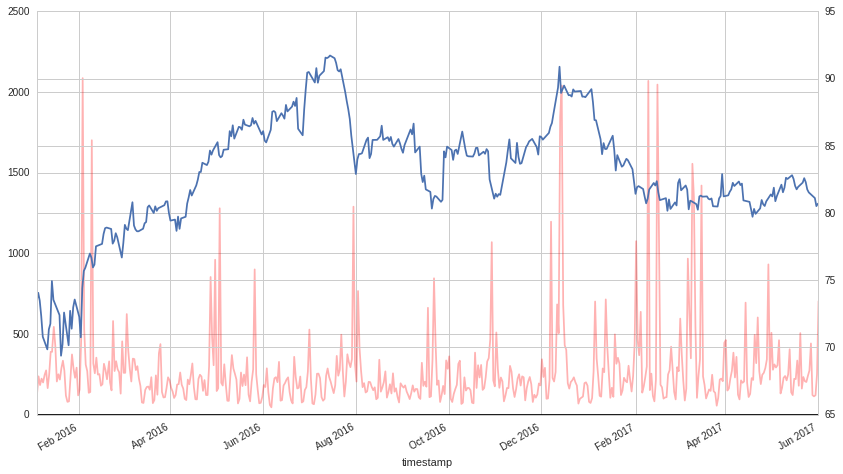

In [168]:
ax = sentiment_df['total_scanned_messages'].plot(c = 'r', alpha = 0.3);
pricing.plot(ax=ax.twinx());
ax.hlines(xmin='2016-01-01',xmax='2017-06-01',y=0);

std: 0.0109092872406
std after spike:


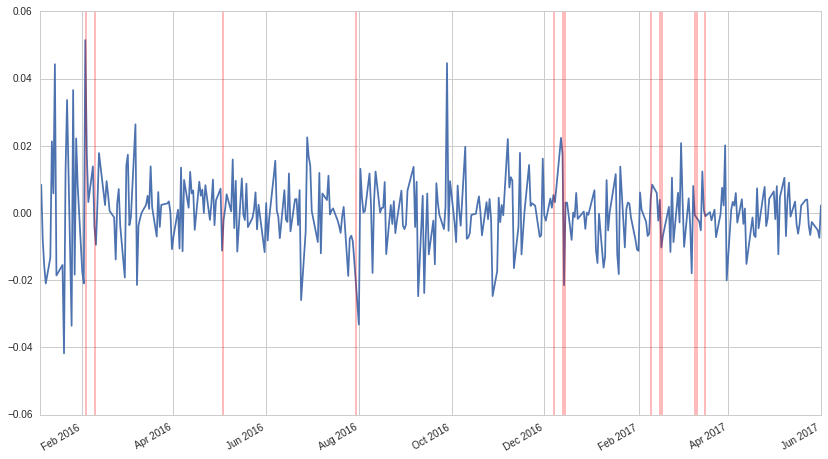

In [177]:
dates = sentiment_df.index[sentiment_df['total_scanned_messages']>np.std(sentiment_df['total_scanned_messages'])*4]

ax = pricing.pct_change(1).plot();
ax.plot();
for i in range(len(dates)):
    ax.axvline(dates[i], c='r', alpha = 0.3);
    


print 'std:', np.std(pricing.pct_change(1));
print 'std after spike:'

Sentiment volume seems like a lagging indicator of price shocks. 

In [156]:
stds = np.zeros(len(dates))
for i in range(len(dates)):
    stds[i] = np.std(pricing.pct_change(1).ix[dates[i].date():dates[i].date()+timedelta(days=5)])
    print stds[i]
    
print np.mean(stds[:-2])

0.0192386307822
0.0143365216364
0.0247164886291
0.0114021376902
0.00693723389722
nan
nan
0.015326202527
